## 1) Model Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statistics import mean

### The monthly_features_outputs dataframe was directly read from Assignment 5

In [2]:
monthly_features_outputs = pd.read_excel('monthly_features_outputs.xlsx')
monthly_features_outputs

,Unnamed: 0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,51,0
1,1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,1,15,0
2,2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,0,0,0,0,0,0,0,46,0
3,3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,NaN,1,0,0,0,0,0,0,12,0
4,4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,98,0
323544,323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,129,0
323545,323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,160,0
323546,323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,...,1.0,0,0,1,0,0,0,0,0,0


In [3]:
monthly_features_outputs = monthly_features_outputs.apply(lambda x: x.fillna(0),axis=0)
monthly_features_outputs

,Unnamed: 0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,51,0
1,1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,1,15,0
2,2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,0.0,0,0,0,0,0,0,0,46,0
3,3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,0.0,1,0,0,0,0,0,0,12,0
4,4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,0.0,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,98,0
323544,323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,129,0
323545,323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,160,0
323546,323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,...,1.0,0,0,1,0,0,0,0,0,0


In [4]:
monthly_features_outputs.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
monthly_features_outputs

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,51,0
1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,1,15,0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,46,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,0.0,1,0,0,0,0,0,0,12,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,1.0,0,0,1,0,0,0,0,0,0


### 1.1 Dataset size vs model performance

**1. Split the train/test sets with 9:1 ratio This split should give you approximately 291k/32k
samples in train/test set, respectively.**

In [5]:
train_data,test_data = train_test_split(monthly_features_outputs, test_size=1/10, random_state=1147)
train_data.shape

(291193, 31)

In [6]:
test_data.shape

(32355, 31)

In [7]:
X_test = test_data.drop(['response','CLNT_NO','ME_DT'],axis=1)
y_test = test_data['response']

**2. Initialize and create a for loop in which you take N samples (e.g. 50), build a tree
model with the N samples and evaluate the test set AUC. Repeat the sampling process
10 times and append the test set AUC.**

In [8]:
N = 50
auc_train = []
auc_test = []
for i in range(10): 
    new_data = train_data.sample(n=N, random_state=i)
    X_train = new_data.drop(['response','CLNT_NO','ME_DT'],axis=1)
    y_train = new_data['response']
    Decision_tree = DecisionTreeClassifier(max_depth = 6, random_state=i, class_weight='balanced')   ### The best depth is 6 from assignment 5
    Decision_tree.fit(X_train, y_train)
    scores_train = Decision_tree.predict_proba(X_train)[:,1] 
    scores_test  = Decision_tree.predict_proba(X_test)[:,1]
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test).round(3))

In [9]:
auc_test

[0.518, 0.508, 0.519, 0.543, 0.49, 0.524, 0.509, 0.516, 0.524, 0.536]

In [10]:
Desired_output = {'sample': np.arange(1,11),
                 'Test AUC': auc_test}
pd.DataFrame(Desired_output)

,sample,Test AUC
0,1,0.518
1,2,0.508
2,3,0.519
3,4,0.543
4,5,0.490
5,6,0.524
6,7,0.509
7,8,0.516
8,9,0.524
9,10,0.536


**3. Repeat the procedure you performed in the previous step for different sample size N
(e.g. 100, 500, 1000, 2000, 5000, 10000)**

This data set has nearly 300,000 samples.<br> So different sample sizes are taken in order to identify the minimum samples required to analyze the model hehaviour 

In [11]:
N = [100,500,1000,5000,10000,20000,50000,100000,150000,200000,250000]
auc_train = []
auc_test = []
mean_test = []
std_test = []
for i in range(len(N)):
    for j in range(10): 
        new_data = train_data.sample(n=N[i], random_state=j)
        X_train = new_data.drop(['response','CLNT_NO','ME_DT'],axis=1)
        y_train = new_data['response']
        Decision_tree = DecisionTreeClassifier(max_depth = 6, random_state=j, class_weight='balanced')
        Decision_tree.fit(X_train, y_train)
        scores_train = Decision_tree.predict_proba(X_train)[:,1] 
        scores_test  = Decision_tree.predict_proba(X_test)[:,1]
        fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
        auc_train.append(auc(fpr_train, tpr_train))
        auc_test.append(auc(fpr_test, tpr_test).round(3))
    mean_test.append(np.mean(auc_test).round(3))
    std_test.append(np.std(auc_test).round(3))
    auc_test.clear()
        

In [12]:
mean_test

[0.515, 0.523, 0.528, 0.586, 0.604, 0.62, 0.634, 0.639, 0.642, 0.644, 0.645]

In [13]:
std_test

[0.023, 0.028, 0.016, 0.009, 0.01, 0.004, 0.004, 0.002, 0.002, 0.001, 0.002]

**4. Build a table that contains the values of:<br>
a) Sample size N<br>
b) Test AUC mean<br>
c) Test AUC standard deviation**

In [14]:
final_table = {'Samples': N, 'Test AUC mean': mean_test, 'Test AUC standard deviation': std_test}
pd.DataFrame(final_table)

,Samples,Test AUC mean,Test AUC standard deviation
0,100,0.515,0.023
1,500,0.523,0.028
2,1000,0.528,0.016
3,5000,0.586,0.009
4,10000,0.604,0.010
5,20000,0.620,0.004
6,50000,0.634,0.004
7,100000,0.639,0.002
8,150000,0.642,0.002
9,200000,0.644,0.001


**5. Using the matplotlib function errorbar, plot the model performance captured in the
test AUC mean and standard deviation as a function of the sample size. From this
plot, can you estimate what is the minimum number of samples needed to model the
behaviour adequately?**

Text(0.5, 1.0, 'Model performance')

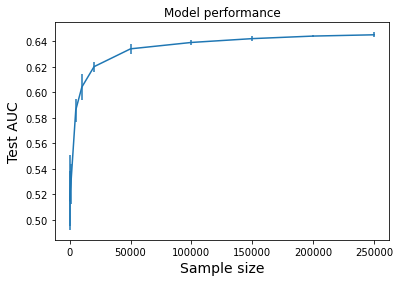

In [15]:
fig = plt.figure()
x = N
y = mean_test
plt.errorbar(x, y, yerr=std_test)
plt.xlabel('Sample size', fontsize=14)
plt.ylabel('Test AUC', fontsize=14)
plt.title('Model performance')

From the above graph we can infer that beyond 50000 samples, the data plateaus or stabilizes.<br>
Therefore, the minimum number of samples required to analyze the model behaviour accurately is 50000.